In [38]:
def train_sent(read_f, write_f, length):
    with open(read_f, 'r') as f:
        count = 0
        for sent in f:
            if count >= length:
                break
            with open(write_f, 'a+') as w:
                if len(sent) > 1:
                    w.write(sent)
                    count += 1

In [39]:
def txt_write_csv(csv_file, txt_file):
    import pandas as pd
    sent = []
    label = []
    with open(txt_file, 'r') as f:
        for line in f:
            sent.append(line)
            label.append('n')
    dataframe = pd.DataFrame({'sentence':sent, 'label':label})
    dataframe.to_csv(csv_file, index=False, sep=',')

In [41]:
train_sent('Data/n_output.txt', 'Data/cluster.txt', 10000)
txt_write_csv('Data/cluster.csv', 'Data/cluster.txt')

In [42]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
def sent_vector(csv_file, length):
    if length > 0:
        csv_data = pd.read_csv(csv_file, low_memory = False, nrows=length)#防止弹出警告
    else:
        csv_data = pd.read_csv(csv_file, low_memory = False)
    csv_df = pd.DataFrame(csv_data)
    sentences = csv_df['sentence']
    label = csv_df['label']
    label.loc[label == 'n'] = 0
    label.loc[label == 'p'] = 1
    model = word2vec.Word2Vec.load('Model/n1_cbow.w2v')
    size = model.wv.syn0.shape[1]
    sents_vec = []
    for sent in sentences:
        sents_vec.append(compute_sent_vec(sent, model, size))
    return np.array(sents_vec), label, sentences
        

In [43]:
def compute_sent_vec(sent, model, size):
    vec = np.zeros(size)
    for word in sent.split():
        if word in model.wv:
            vec += model.wv[word]
    vec /= len(sent.split())
    return vec


In [45]:
sents_vec, label, sentences = sent_vector('Data/training_data.csv', -1)

/workspace/anaconda3/envs/acai/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/workspace/anaconda3/envs/acai/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app


In [ ]:
#self implemented logistic regression
from classifier.logistic_regression import LogisticRegression
l = LogisticRegression(sents_vec[:700], label[:700])
cost = l.train(0.1,1000)
pred_y = l.predict(sents_vec[300:], label[300:])

In [ ]:
#sklearn logistic regression result
from sklearn.linear_model import LogisticRegression
label = np.array(label, dtype='int')
clf = LogisticRegression(max_iter=1000).fit(sents_vec[:700], label[:700])
test_accuracy = clf.score(sents_vec[300:], label[300:])*100
pred = clf.predict(sents_vec[300:])
print("正确率为%s%%" % test_accuracy)

In [10]:
# self implemented k means
from cluster.k_means import KMeans
from collections import defaultdict
km = KMeans()
km.train(3, sents_vec[:1000])
result = km.predict(sents_vec[:1000])
sents_cluster = defaultdict(list)
x = [sents_cluster[result[i]].append(sentences[i]) for i in range(len(result))]

/workspace/anaconda3/envs/acai/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


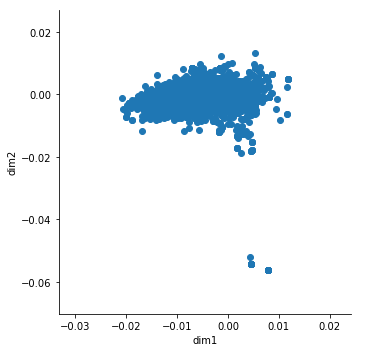

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
U,S,V = np.linalg.svd(sents_vec[:10000])
sents_vec = U[:,:2]
df = pd.DataFrame(sents_vec, columns=['dim1', 'dim2'])
sns.FacetGrid(df, size=5).map(plt.scatter, "dim1", "dim2").add_legend()

In [47]:
from sklearn.cluster import KMeans
from collections import defaultdict
kmeans = KMeans(n_clusters=3).fit(sents_vec)
result = kmeans.predict(sents_vec)
sents_cluster1 = defaultdict(list)
x = [sents_cluster1[result[i]].append(sentences[i]) for i in range(len(result))]

In [50]:
sents_cluster1[2]

['接到 用户 举报 ， 经 核实 吧 主   热血 笨蛋 火神君   长期 未 对 贴 吧 进行 管理 及 发言 ， 无法 在 建设   王炸 的 麻袋 吧   内容 上 、 言论 导向 上 发挥 应有 的 模范带头 作用 ， 严重 违反 吧 主 协议 ， 故 撤销 其 吧 主 管理权限 。 如对 此项 决议 有 异议 ， 请 至 贴 吧 反馈 中心 进行 申诉 ， 链接   http : tieba . baidu . comhermesfeedback\n',
 '百度 贴 吧 管理 组\n',
 '接到 用户 举报 ， 经 核实 吧 主   腹黑 天使 艾萨克   长期 未 对 贴 吧 进行 管理 及 发言 ， 无法 在 建设   王炸 的 麻袋 吧   内容 上 、 言论 导向 上 发挥 应有 的 模范带头 作用 ， 严重 违反 吧 主 协议 ， 故 撤销 其 吧 主 管理权限 。 如对 此项 决议 有 异议 ， 请 至 贴 吧 反馈 中心 进行 申诉 ， 链接   http : tieba . baidu . comhermesfeedback\n',
 '百度 贴 吧 管理 组\n',
 '袋子 回不去 了 啦\n',
 '笑死人\n',
 '一台 机器人 一天 能 弄 40 - 50 ， 十 台 机器人 一天 能 弄 400 - 500 ， 想要 了解 的 ➕ V ， 非诚 勿扰\n',
 '欢迎 各位 袋友 到此一游\n',
 '不禁 一切\n',
 '祝丑 千千 灵堂 祭奠 活动 一切顺利 。 🙏 🙏 🙏 🙏 🙏\n',
 '午安\n',
 '此楼 不 需要 控   楼主 先跨 出楼   回见\n',
 '带 板凳 围观\n',
 '给 纸鸟 占个 坐\n',
 '跨 ， ctm 太 阴森 了\n',
 '跨跨跨\n',
 '邪教 现场\n',
 '生日快乐\n',
 '原地\n',
 '百鬼 夜行 ， 群魔乱舞\n',
 '丑柑 19 了\n',
 '祝 我们 葛如钩 20 岁 生活 快乐\n',
 '跨 一下\n',
 '哈哈哈哈 哈哈哈哈\n',
 '来看 小 钱包 啦\n',
 '敢不敢 全开 麦 ？\n',
 '吃 着 螺狮粉 抖腿等   这 一袋 热量 可太高 了\n',
 '不敢 再入 这楼 ， 怕怕\n',
 '绿茶 植入 简直 